# 1. Creating the starting dataframe for Toronto

In [1]:
pip install lxml

     |████████████████████████████████| 5.8MB 27.1MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
#pip install beautifulsoup4

In [3]:
import pandas as pd

#### Retrieving the data from wikipedia

In [4]:
df_toronto = pd.read_html( 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M', header = 0)
df_toronto = df_toronto[0]


In [5]:
df_toronto

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
...,...,...,...
282,M8Z,Etobicoke,Mimico NW
283,M8Z,Etobicoke,The Queensway West
284,M8Z,Etobicoke,Royal York South West
285,M8Z,Etobicoke,South of Bloor


#### Dealing with missing data and grouping the neighbourhoods

In [6]:
df_filter = df_toronto[df_toronto['Borough']!= 'Not assigned']
#df_filter.sort_values(by = ['Postcode'])
df_filter

,Postcode,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M6A,North York,Lawrence Heights
6,M6A,North York,Lawrence Manor
...,...,...,...
281,M8Z,Etobicoke,Kingsway Park South West
282,M8Z,Etobicoke,Mimico NW
283,M8Z,Etobicoke,The Queensway West
284,M8Z,Etobicoke,Royal York South West


In [7]:
df_grouped = df_filter.groupby(['Postcode', 'Borough'])['Neighbourhood'].apply(', '.join).reset_index()
df_grouped['Neighbourhood'][101]

'Albion Gardens, Beaumond Heights, Humbergate, Jamestown, Mount Olive, Silverstone, South Steeles, Thistletown'

In [8]:
df_grouped.loc[df_grouped['Neighbourhood']=='Not assigned', 'Borough']

93    Queen's Park
Name: Borough, dtype: object

In [10]:
df_grouped.at[df_grouped['Neighbourhood']=='Not assigned', 'Neighbourhood'] = \
df_grouped.loc[df_grouped['Neighbourhood']=='Not assigned', 'Borough']

#### Dataframe required for point #1

In [11]:
df_grouped[90:]

,Postcode,Borough,Neighbourhood
90,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
91,M8Y,Etobicoke,"Humber Bay, King's Mill Park, Kingsway Park So..."
92,M8Z,Etobicoke,"Kingsway Park South West, Mimico NW, The Queen..."
93,M9A,Queen's Park,Queen's Park
94,M9B,Etobicoke,"Cloverdale, Islington, Martin Grove, Princess ..."
95,M9C,Etobicoke,"Bloordale Gardens, Eringate, Markland Wood, Ol..."
96,M9L,North York,Humber Summit
97,M9M,North York,"Emery, Humberlea"
98,M9N,York,Weston
99,M9P,Etobicoke,Westmount


In [12]:
df_grouped.shape

(103, 3)

# Retrieving the coordinates for the neighborhoods

In [13]:
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.2

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



#### geopy does not seem to suit our purpose

In [14]:
geolocator = Nominatim(user_agent="assignment_agent")
location = geolocator.geocode( {"city": 'Toronto'}, {"postalcode": 'M9N'})
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

43.653963 -79.387207


In [55]:
location = geolocator.geocode(  {"postalcode": 'M9N 2J9'} )
location

In [25]:
pip install geocoder

     |████████████████████████████████| 102kB 16.4MB/s ta 0:00:01
     |████████████████████████████████| 829kB 23.2MB/s eta 0:00:01
     |████████████████████████████████| 81kB 19.9MB/s eta 0:00:01
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/8b/99/a0/81daf51dcd359a9377b110a8a886b3895921802d2fc1b2397e
Successfully built future
Note: you may need to restart the kernel to use updated packages.


In [56]:
import geocoder

#### The google geocoder does not return anything useful - well actually anything at all

In [57]:
g = geocoder.google('Toronto, Ontario')
g

<[REQUEST_DENIED] Google - Geocode [empty]>

#### arcgis seems to work

In [58]:
g = geocoder.arcgis('{}, Toronto, Ontario'.format('M5G'))
lat_lng_coords = g.latlng
latitude = lat_lng_coords[0]
longitude = lat_lng_coords[1]
print (latitude, longitude)

43.65609081300005 -79.38492999999994


In [20]:
g = geocoder.arcgis('{}, Toronto, Ontario'.format('M9N'))
lat_lng_coords = g.latlng
latitude = lat_lng_coords[0]
longitude = lat_lng_coords[1]
print (latitude, longitude)

43.704845000000034 -79.51754601599998


In [22]:
def lat(row):
    #print(row['Postcode'])
    pcode = row['Postcode']
    g = geocoder.arcgis('{}, Toronto, Ontario'.format(pcode))
    return g.latlng

In [24]:
df_grouped['latlng'] = df_grouped.apply(lambda x: lat(x), axis =1)

In [25]:
df_grouped

,Postcode,Borough,Neighbourhood,latlng
0,M1B,Scarborough,"Rouge, Malvern","[43.811525000000074, -79.19551746399998]"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union","[43.78566500000005, -79.15872457299997]"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill","[43.76581500000003, -79.17519294699997]"
3,M1G,Scarborough,Woburn,"[43.768369121000035, -79.21758999999997]"
4,M1H,Scarborough,Cedarbrae,"[43.76968799900004, -79.23943999999995]"
...,...,...,...,...
98,M9N,York,Weston,"[43.704845000000034, -79.51754601599998]"
99,M9P,Etobicoke,Westmount,"[43.69650500000006, -79.53025233799997]"
100,M9R,Etobicoke,"Kingsview Village, Martin Grove Gardens, Richv...","[43.68681000000004, -79.55728354099995]"
101,M9V,Etobicoke,"Albion Gardens, Beaumond Heights, Humbergate, ...","[43.74314500000003, -79.58466389699998]"


In [26]:
df_ll = df_grouped.copy()

In [28]:
df_ll['Latitude'] = df_ll['latlng'].str[0]

In [29]:
df_ll['Longitude'] = df_ll['latlng'].str[1]

In [30]:
df_ll[df_ll['Postcode']=='M5G']

,Postcode,Borough,Neighbourhood,latlng,Latitude,Longitude
57,M5G,Downtown Toronto,Central Bay Street,"[43.65609081300005, -79.38492999999994]",43.656091,-79.38493


In [31]:
df_ll = df_ll.drop('latlng', 1)

#### Dataframe ready to be used for the cluster analyses as required in point #2

In [32]:
df_ll

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.811525,-79.195517
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.785665,-79.158725
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.765815,-79.175193
3,M1G,Scarborough,Woburn,43.768369,-79.217590
4,M1H,Scarborough,Cedarbrae,43.769688,-79.239440
...,...,...,...,...,...
98,M9N,York,Weston,43.704845,-79.517546
99,M9P,Etobicoke,Westmount,43.696505,-79.530252
100,M9R,Etobicoke,"Kingsview Village, Martin Grove Gardens, Richv...",43.686810,-79.557284
101,M9V,Etobicoke,"Albion Gardens, Beaumond Heights, Humbergate, ...",43.743145,-79.584664


# Cluster analysis

In [33]:
import json 
import requests 
from pandas.io.json import json_normalize 
import numpy as np

In [35]:
df_tor = df_ll[df_ll['Borough'].str.contains('Toronto')]
df_tor

,Postcode,Borough,Neighbourhood,Latitude,Longitude
37,M4E,East Toronto,The Beaches,43.676531,-79.295425
41,M4K,East Toronto,"The Danforth West, Riverdale",43.683178,-79.355105
42,M4L,East Toronto,"The Beaches West, India Bazaar",43.667965,-79.314667
43,M4M,East Toronto,Studio District,43.660629,-79.334855
44,M4N,Central Toronto,Lawrence Park,43.728420,-79.387133
45,M4P,Central Toronto,Davisville North,43.712755,-79.388514
46,M4R,Central Toronto,North Toronto West,43.714523,-79.406960
47,M4S,Central Toronto,Davisville,43.703395,-79.385964
48,M4T,Central Toronto,"Moore Park, Summerhill East",43.690685,-79.382946
49,M4V,Central Toronto,"Deer Park, Forest Hill SE, Rathnelly, South Hi...",43.686074,-79.402265


#### Using the foursquare API

In [36]:
CLIENT_ID = #'XXX' 
CLIENT_SECRET = #'XXX' 
VERSION = '20180605' # Foursquare API version


In [37]:
lat = df_ll.loc[77, 'Latitude']
lon = df_ll.loc[77, 'Longitude']
lat, lon

(43.64852500000006, -79.41775713399994)

#### Testing on one neighbourhood

In [40]:
radius = 500
LIMIT = 10
query = 'restaurant'
url1 = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat, lon, VERSION, qu
results = requests.get(url1).json()
results

{'meta': {'code': 200, 'requestId': '5e545b653907e7001b9003bf'},
 'response': {'venues': [{'id': '4b22e814f964a520175024e3',
    'name': 'The Lakeview Restaurant',
    'location': {'address': '1132 Dundas St. W',
     'crossStreet': 'at Ossington Ave.',
     'lat': 43.64943515996231,
     'lng': -79.42039021958406,
     'labeledLatLngs': [{'label': 'display',
       'lat': 43.64943515996231,
       'lng': -79.42039021958406}],
     'distance': 235,
     'postalCode': 'M6J 1X2',
     'cc': 'CA',
     'city': 'Toronto',
     'state': 'ON',
     'country': 'Canada',
     'formattedAddress': ['1132 Dundas St. W (at Ossington Ave.)',
      'Toronto ON M6J 1X2',
      'Canada']},
    'categories': [{'id': '4bf58dd8d48988d147941735',
      'name': 'Diner',
      'pluralName': 'Diners',
      'shortName': 'Diner',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/diner_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1582586817',
    'hasPerk': Fal

In [42]:
n = len(results['response']['venues'])
n

8

In [43]:
test_id = results['response']['venues'][7]['id']
name = results['response']['venues'][7]['name']
name

'Foxley Bistro'

In [44]:
test_id

'4af369d0f964a52060ed21e3'

In [43]:
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(test_id, CLIENT_ID, CLIENT_SECRET, VERSION)
print(url)
results_id = requests.get(url).json()
results_id

https://api.foursquare.com/v2/venues/4af369d0f964a52060ed21e3?client_id=Y2I1UEIHKILT4WF44LFF3LO1103IPOYI41O5OXS0HLI1EOYV&client_secret=SEOER1DQW4QQSPI1KW2L4GAK5LWKS5M5KPABCFBPCSQCDWJ1&v=20180605


{'meta': {'code': 200, 'requestId': '5e52dc1e1835dd001be0d3ec'},
 'response': {'venue': {'id': '4af369d0f964a52060ed21e3',
   'name': 'Foxley Bistro',
   'contact': {'phone': '4165348520', 'formattedPhone': '(416) 534-8520'},
   'location': {'address': '207 Ossington Ave',
    'crossStreet': 'Dundas',
    'lat': 43.648642746283834,
    'lng': -79.42049525794245,
    'labeledLatLngs': [{'label': 'display',
      'lat': 43.648642746283834,
      'lng': -79.42049525794245}],
    'postalCode': 'M6J 2Z8',
    'cc': 'CA',
    'city': 'Toronto',
    'state': 'ON',
    'country': 'Canada',
    'formattedAddress': ['207 Ossington Ave (Dundas)',
     'Toronto ON M6J 2Z8',
     'Canada']},
   'canonicalUrl': 'https://foursquare.com/v/foxley-bistro/4af369d0f964a52060ed21e3',
   'categories': [{'id': '4bf58dd8d48988d142941735',
     'name': 'Asian Restaurant',
     'pluralName': 'Asian Restaurants',
     'shortName': 'Asian',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asia

In [44]:
results_id['response']['venue']['rating']

8.8

In [45]:
results_id['response']['venue']['price']['tier']

2

In [45]:
df_test = df_tor[26:27]
df_test

,Postcode,Borough,Neighbourhood,Latitude,Longitude
67,M5T,Downtown Toronto,"Chinatown, Grange Park, Kensington Market",43.65353,-79.397233


#### For each neighbourhood the code will retrieve the average rating and price tier of the restaurants in the radius of 800 meters. Unfortunately FourSquare seems to return just a small number of entries, the statistics will not be very significant.

In [46]:
def get_price_ratings(row):
    radius = 800
    LIMIT = 20
    VERSION = '20200101'
    query = 'restaurant'
    print(row['Postcode'])
    lat = row['Latitude']
    lon = row['Longitude']
    print(lat, lon)
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat, lon, VERSION, query, radius, LIMIT)
    results = requests.get(url).json()
    n = len(results['response']['venues'])
    print(n)
    ptiers = []
    ratings = []
    for i in range(n):
        print(i, results['response']['venues'][i]['name'])
        res_id = results['response']['venues'][i]['id']
        url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(res_id, CLIENT_ID, CLIENT_SECRET, VERSION)
        results_id = requests.get(url).json()
        #print(results_id)
        if ('price' in results_id['response']['venue']) and ('rating' in results_id['response']['venue']):
            rating = results_id['response']['venue']['rating']
            ptier = results_id['response']['venue']['price']['tier']
            #print(i, 'price, rating', ptier, rating)
            ptiers.append(ptier)
            ratings.append(rating)
    ptiers = np.array(ptiers)
    ratings = np.array(ratings)
    print(len(ptiers), ptiers.mean(), ratings.mean())
    print('')
    return pd.Series([ptiers.mean(), ratings.mean()])

#### Running the code on the dataframe, enriching it with the calculated result

In [47]:
df_tor[['Price Tier', 'Rating']] = df_tor.apply(lambda x: get_price_ratings(x), axis = 1)

M4E
43.67653121600006 -79.29542499999997
5
0 Seaspray Restaurant
1 Bikkuri Japanese Restaurant
2 Honey Bee Restaurant
3 Kingston Chinese Restaurant
4 Cool Runnings
2 1.5 6.8

M4E
43.67653121600006 -79.29542499999997
5
0 Seaspray Restaurant
1 Bikkuri Japanese Restaurant
2 Honey Bee Restaurant
3 Kingston Chinese Restaurant
4 Cool Runnings
2 1.5 6.8

M4K
43.68317787500007 -79.35510499999998
19
0 Herby Restaurant
1 Beiteddine Lebanese Restaurant
2 Katsu Japanese Restaurant
3 East York Restaurant
4 Number One Chinese Restaurant
5 Megas Restaurant
6 Greek Garden Restaurant
7 Florentina's Italian Restaurant
8 Osmow’s Authentic Mediterranean Restaurant
9 Simone's Caribbean Restaurant
10 Friendly Greek Restaurant
11 The Palace Restaurant
12 Camel Restaurant
13 Dairy Queen
14 Pantheon
15 New York Cafe
16 Subway
17 Asteria
18 Subway
9 1.6666666666666667 6.966666666666667

M4L
43.66796500000004 -79.31466717299998
7
0 Occasions Restaurant
1 Delina Restaurant
2 Regency Restaurant
3 JP Restaurant
4 H

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: Mean of empty slice.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  return ufunc(*args, out=out, **kwargs)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: Mean of empty slice.


11
0 Homeway Restaurant & Brunch
1 808 Restaurant - Best western
2 Ho Su Korean & Japanese Restaurant
3 Maybes Restaurant
4 The Seven44 Restaurant {e_venue}amp; Lounge
5 Good Bite Restaurant
6 Centro Restaurant & Lounge
7 Alizé Restaurant
8 Sorn Thai Restaurant
9 Subway
10 Alleycatz Live Jazz Bar
6 2.0 6.499999999999999

M4R
43.71452278400005 -79.40695999999997
8
0 LOLO restaurant
1 Good Bite Restaurant
2 Sorn Thai Restaurant
3 Centro Restaurant & Lounge
4 Alizé Restaurant
5 Mars Uptown Restaurant
6 Alleycatz Live Jazz Bar
7 Oliver & Bonacini Restaurants
5 2.0 6.42

M4S
43.70339500000006 -79.38596360499997
8
0 South China Restaurant
1 Samovar Barmalay Russian Restaurant
2 The Seven44 Restaurant {e_venue}amp; Lounge
3 Maybes Restaurant
4 808 Restaurant - Best western
5 Restaurantacular
6 Subway
7 Fox & Firkin
2 1.0 6.6

M4T
43.69068500000003 -79.38294574299994
4
0 Arthur’s Restaurant
1 New Thai Restaurant
2 Kwan Restaurant
3 Suki Japanese Cuisine
3 2.0 6.833333333333333

M4V
43.68607377

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:3509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


#### Since the number of calls to FourSquare is limited and running the code takes some time, results are saved to a csv file. Further analysis start directly from this file.

In [53]:
df_tor.to_csv('Toronto_Price_Rating', index = True, sep = ';', encoding = 'ISO-8859-1')

In [50]:
df_data = df_tor.dropna()

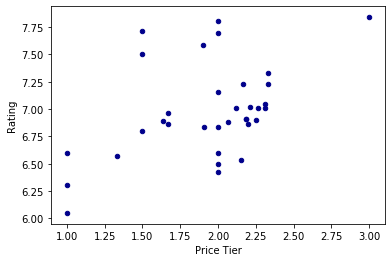

In [52]:
ax1 = df_data.plot.scatter(x='Price Tier', y='Rating', c='DarkBlue')
ax1

#### Reading the previously saved data

In [1]:
import pandas as pd
df_tor = pd.read_csv('Toronto_Price_Rating', sep = ';', index_col = 0, encoding = 'ISO-8859-1', header = 0).dropna()
df_tor

,Postcode,Borough,Neighbourhood,Latitude,Longitude,Price Tier,Rating
37,M4E,East Toronto,The Beaches,43.676531,-79.295425,1.500000,6.800000
41,M4K,East Toronto,"The Danforth West, Riverdale",43.683178,-79.355105,1.666667,6.966667
42,M4L,East Toronto,"The Beaches West, India Bazaar",43.667965,-79.314667,1.666667,6.866667
43,M4M,East Toronto,Studio District,43.660629,-79.334855,2.000000,7.700000
45,M4P,Central Toronto,Davisville North,43.712755,-79.388514,2.000000,6.500000
46,M4R,Central Toronto,North Toronto West,43.714523,-79.406960,2.000000,6.420000
47,M4S,Central Toronto,Davisville,43.703395,-79.385964,1.000000,6.600000
48,M4T,Central Toronto,"Moore Park, Summerhill East",43.690685,-79.382946,2.000000,6.833333
49,M4V,Central Toronto,"Deer Park, Forest Hill SE, Rathnelly, South Hi...",43.686074,-79.402265,2.333333,7.233333
51,M4X,Downtown Toronto,"Cabbagetown, St. James Town",43.668160,-79.366602,1.333333,6.566667


In [2]:
import numpy as np

#### Normalizing the variables (ratings and price tier)

In [3]:
ratings = df_tor['Rating'].values
prices = df_tor['Price Tier'].values
ratings_avg = ratings.mean()
ratings_std = ratings.std()
#ratings_delta = (ratings.max() - ratings.min()) / ratings.mean()
prices_avg = prices.mean()
prices_std = prices.std()
#prices_delta = (prices.max() - prices.min()) / prices.mean()
print('Normalization factors: ', ratings_avg, ratings_std, prices_avg, prices_std)

Normalization factors:  6.982937072299096 0.42337910261676975 1.932781376639508 0.42670582419757663


In [4]:
#df_tor['Rating_norm'] = (df_tor['Rating']/ratings_avg - 1) / ratings_delta
#df_tor['Price_Tier_norm'] = (df_tor['Price Tier']/prices_avg - 1) / prices_delta
df_tor['Rating_norm'] = (df_tor['Rating']- ratings_avg)/ratings_std
df_tor['Price_Tier_norm'] = (df_tor['Price Tier'] - prices_avg) / prices_std
df_tor.head()

,Postcode,Borough,Neighbourhood,Latitude,Longitude,Price Tier,Rating,Rating_norm,Price_Tier_norm
37,M4E,East Toronto,The Beaches,43.676531,-79.295425,1.500000,6.800000,-0.432088,-1.014238
41,M4K,East Toronto,"The Danforth West, Riverdale",43.683178,-79.355105,1.666667,6.966667,-0.038430,-0.623649
42,M4L,East Toronto,"The Beaches West, India Bazaar",43.667965,-79.314667,1.666667,6.866667,-0.274625,-0.623649
43,M4M,East Toronto,Studio District,43.660629,-79.334855,2.000000,7.700000,1.693666,0.157529
45,M4P,Central Toronto,Davisville North,43.712755,-79.388514,2.000000,6.500000,-1.140673,0.157529


In [5]:
ax1 = df_tor.plot.scatter(x='Price_Tier_norm', y='Rating_norm', c='DarkBlue')
ax1

#### Using KMeans to cluster the data

In [6]:
from sklearn.cluster import KMeans

kclusters = 4
df_tor_cl = df_tor[['Price_Tier_norm', 'Rating_norm']]
#df_tor_cl = df_tor[['Rating']]
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_tor_cl)
#df_tor_cl['Price Tier'] = df_tor['Price Tier']
df_tor['cluster'] = kmeans.labels_
df_tor

,Postcode,Borough,Neighbourhood,Latitude,Longitude,Price Tier,Rating,Rating_norm,Price_Tier_norm,cluster
37,M4E,East Toronto,The Beaches,43.676531,-79.295425,1.500000,6.800000,-0.432088,-1.014238,2
41,M4K,East Toronto,"The Danforth West, Riverdale",43.683178,-79.355105,1.666667,6.966667,-0.038430,-0.623649,2
42,M4L,East Toronto,"The Beaches West, India Bazaar",43.667965,-79.314667,1.666667,6.866667,-0.274625,-0.623649,2
43,M4M,East Toronto,Studio District,43.660629,-79.334855,2.000000,7.700000,1.693666,0.157529,0
45,M4P,Central Toronto,Davisville North,43.712755,-79.388514,2.000000,6.500000,-1.140673,0.157529,2
46,M4R,Central Toronto,North Toronto West,43.714523,-79.406960,2.000000,6.420000,-1.329629,0.157529,2
47,M4S,Central Toronto,Davisville,43.703395,-79.385964,1.000000,6.600000,-0.904478,-2.186006,3
48,M4T,Central Toronto,"Moore Park, Summerhill East",43.690685,-79.382946,2.000000,6.833333,-0.353356,0.157529,2
49,M4V,Central Toronto,"Deer Park, Forest Hill SE, Rathnelly, South Hi...",43.686074,-79.402265,2.333333,7.233333,0.591423,0.938707,1
51,M4X,Downtown Toronto,"Cabbagetown, St. James Town",43.668160,-79.366602,1.333333,6.566667,-0.983210,-1.404827,3


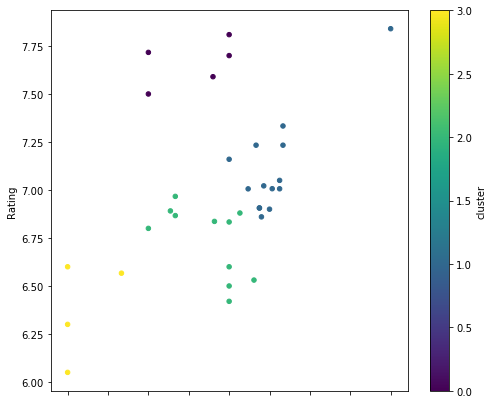

In [7]:
ax1 = df_tor.plot.scatter(x='Price Tier', y='Rating', c='cluster', colormap = 'viridis', figsize = (8,7))
ax1

#### Averaging over many restaurants reduces the range of prices and ratings. The statistic is not large, nonetheless the clusters could be identified as follows:
 - Cluster 0: Neighbourhoods with high ratings and average price.
 - Cluster 1: Neighbourhoods with average ratings but moderately expensive
 - Cluster 2: Neighbourhoods with average ratings but cheaper prices
 - Cluster 3: Neighbourhoods with low ratings and cheaper prices

In [10]:
import folium

In [15]:
address = 'Toronto, Canada'

location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.653963, -79.387207.


In [16]:
import matplotlib.cm as cm
import matplotlib.colors as colors
z = np.arange(len(kmeans.labels_))
ys = [i + z + (i*z)**2 for i in range(kclusters)]
ys
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
colors_array
rainbow = [colors.rgb2hex(i) for i in colors_array]
rainbow

['#8000ff', '#2adddd', '#d4dd80', '#ff0000']

In [17]:
# import matplotlib
# from matplotlib.colors import rgb2hex

# cmap = matplotlib.cm.get_cmap('Spectral')

# rgba = cmap(2)
# print(rgba[0:3]) # (0.99807766255210428, 0.99923106502084169, 0.74602077638401709, 1.0)
# rgb2hex(rgba[0:3])

In [18]:
# create map of New York using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)
z = np.arange(len(kmeans.labels_))
ys = [i + z + (i*z)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to map
for lat, lng, borough, neighborhood, cluster in\
zip(df_tor['Latitude'], df_tor['Longitude'], df_tor['Borough'], df_tor['Neighbourhood'], df_tor['cluster']):
    label = '{}, {}, {}'.format(neighborhood, borough, cluster)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=rainbow[cluster],
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

<img src="toronto_picture.png">